## Main File cum Report for Question 1 - Implementing K-Nearest Neighbours

The contents of this file use modules/functions written for KNN as a part of question 1 named `KNN` in `KNN.py` and `get_dataset` from `dataset_gen.py`. Pre-existing modules used include: 

+ `os` for the `listdir` function
+ `time` for calculating the time (`clock` function)
+ `numpy` for some vector operations
+ `matplotlib.pyplot` for plotting purposes

Suitable comments and annotations have been added in important places.

In [1]:
import KNN
import numpy as np
import pandas as pd
from os import listdir
from time import clock
from dataset_gen import get_dataset

%matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC

print("Imports done.")

Imports done.


In [2]:
def accuracy(actual, predicted):
    assert len(actual) == len(predicted), "Wrong dimensions of comparable outputs"
    diffs = np.abs(actual - predicted).mean()
    accrcy = (1 - diffs)*100
    
    return float(round(accrcy, 5))

In [3]:
# Generate my dataset using get_dataset
# Number of points = 1500 and number of attributes (A, B, C, D, E, F) = 6
if 'dataset.csv' not in listdir('.'):
    get_dataset(1500, 6)
print("Datasets generated and stored")

Datasets generated and stored


In [4]:
tr = np.genfromtxt("train_split.csv", delimiter=',')
te = np.genfromtxt("test_split.csv", delimiter=',')

tr_x, tr_y = tr[:, 1:7], tr[:, 7]
te_x, te_y = te[:, 1:7], te[:, 7]

print("Training inputs shape:\t{0}\tTraining outputs shape:\t{1}".format(tr_x.shape, tr_y.shape))
print("Testing inputs shape:\t{0}\tTesting outputs shape:\t{1}".format(te_x.shape, te_y.shape))

Training inputs shape:	(1200, 6)	Training outputs shape:	(1200,)
Testing inputs shape:	(300, 6)	Testing outputs shape:	(300,)


<IPython.core.display.Javascript object>


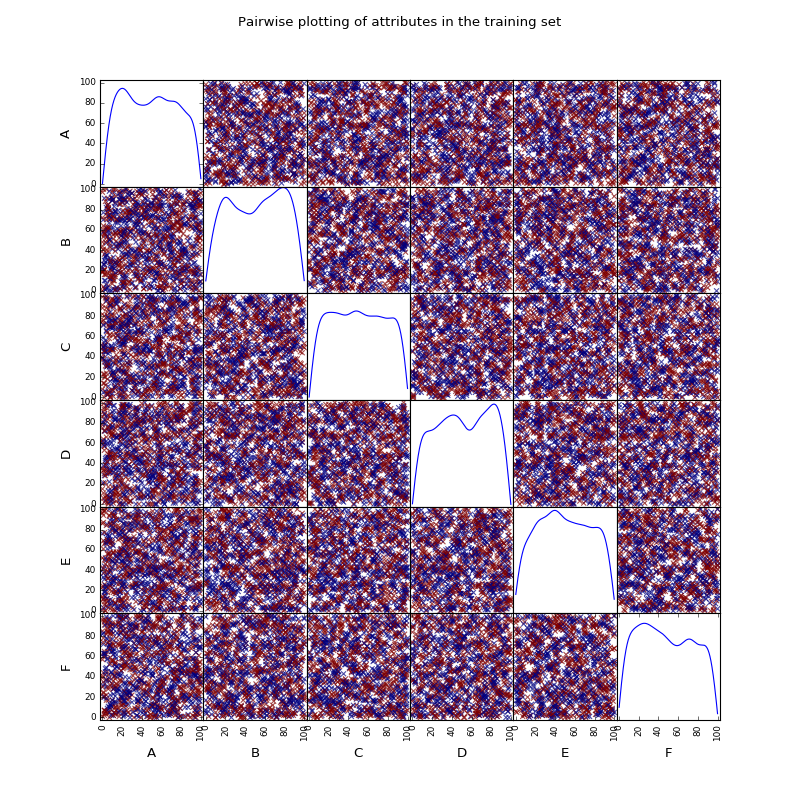

<IPython.core.display.Javascript object>


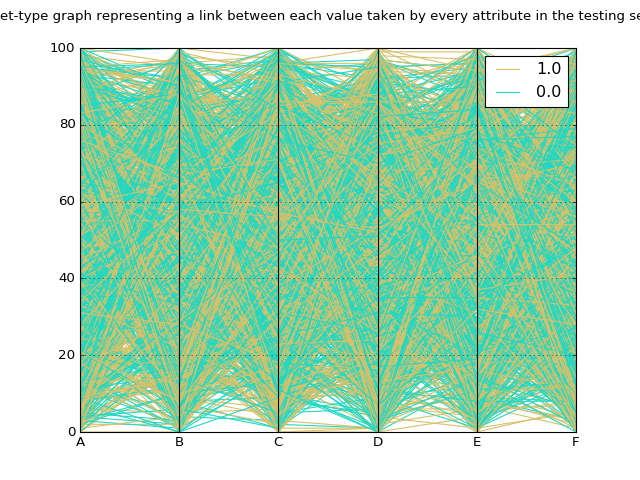

In [5]:
df_tr = pd.DataFrame({'A': tr_x[:,0], 'B': tr_x[:,1], 'C': tr_x[:,2], 'D': tr_x[:,3], 'E': tr_x[:,4], 'F': tr_x[:,5], 'Y':tr_y[:]})

# All pairs with a kernel density estimation along the diagonal
ax = pd.tools.plotting.scatter_matrix(df_tr.loc[:,['A', 'B', 'C', 'D', 'E', 'F']], figsize=(10, 10), marker='x', c=df_tr['Y'], alpha=0.7, diagonal='kde')
plt.suptitle('Pairwise plotting of attributes in the training set');
plt.figure()
pd.tools.plotting.parallel_coordinates(df_tr, 'Y');
plt.suptitle('Net-type graph representing a link between each value taken by every attribute in the testing set');

<IPython.core.display.Javascript object>


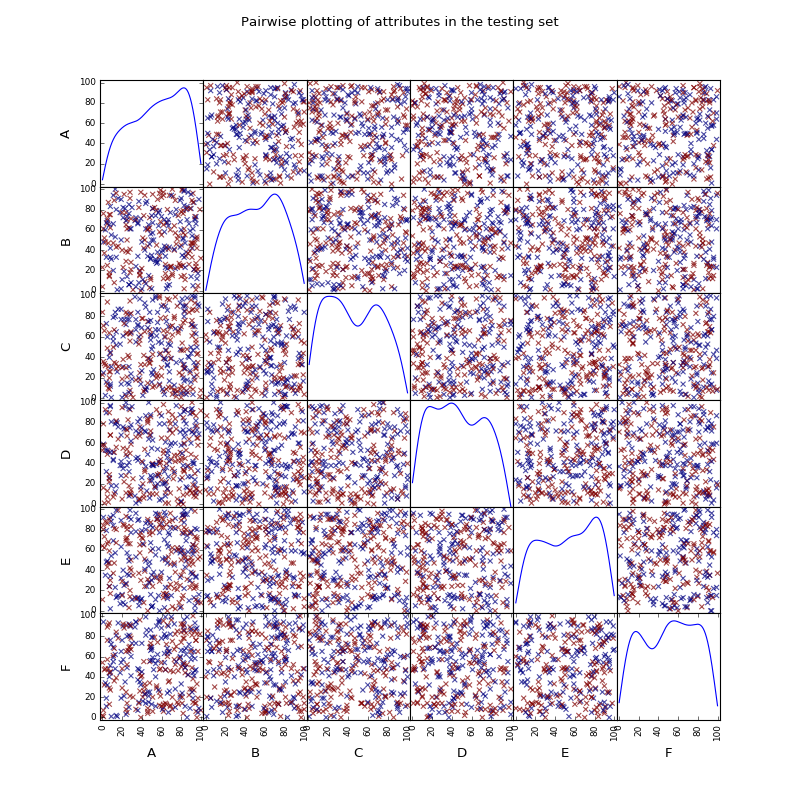

<IPython.core.display.Javascript object>


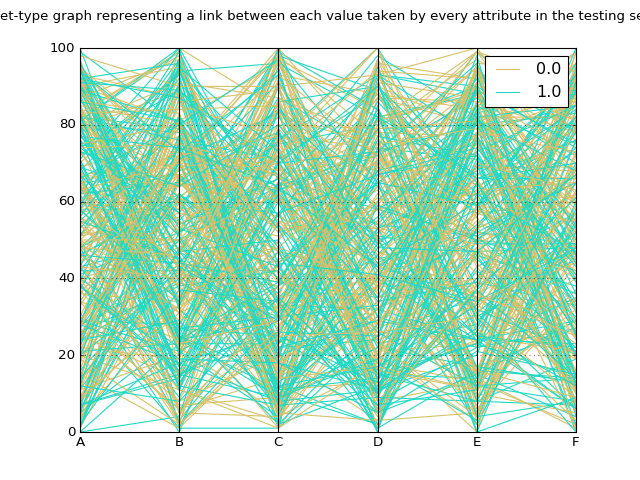

In [6]:
df_te = pd.DataFrame({'A': te_x[:,0], 'B': te_x[:,1], 'C': te_x[:,2], 'D': te_x[:,3], 'E': te_x[:,4], 'F': te_x[:,5], 'Y':te_y[:]})

# All pairs with a kernel density estimation along the diagonal
ax = pd.tools.plotting.scatter_matrix(df_te.loc[:,['A', 'B', 'C', 'D', 'E', 'F']], figsize=(10, 10), marker='x', c=df_te['Y'], alpha=0.7, diagonal='kde')
plt.suptitle('Pairwise plotting of attributes in the testing set');
plt.figure()
pd.tools.plotting.parallel_coordinates(df_te, 'Y');
plt.suptitle('Net-type graph representing a link between each value taken by every attribute in the testing set');

Above are the required plots. I have chosen the dimensions to plot the scatter randomly. Due to the scatter the positioning of the key was hard. The red 'x's denote class 1 and blue 'x's denote class 0.

In [7]:
# Now I am going to run k-Nearest Neighbors
# Methods in consideration:
# 1. My implementation
# 2. sklearn implementation with algorithm = 'brute'
# 3. sklearn implementation with algorithm = 'auto'
train_accuracy_vals = {'my_impl': [], 'sklearn_impl_with_brute': [], 'sklearn_impl_with_auto':[]}
test_accuracy_vals = {'my_impl': [], 'sklearn_impl_with_brute': [], 'sklearn_impl_with_auto':[]}
train_time_vals = {'my_impl': [], 'sklearn_impl_with_brute': [], 'sklearn_impl_with_auto':[]}
test_time_vals = {'my_impl': [], 'sklearn_impl_with_brute': [], 'sklearn_impl_with_auto':[]}

max_k = 21
for k in range(1, max_k + 1):
    print('KNN with K = {0} running'.format(k))
    
    my_knn = KNN.KNN(K=k)
    my_knn.fit(X=tr_x, y=tr_y)
    
    # Performing the predictions on the train set using my implementation
    t_0 = clock()
    predictions = my_knn.predict(X=tr_x)
    cur_time = clock()
    train_time_vals['my_impl'].append([k, round(cur_time - t_0, 5)])
    train_accuracy_vals['my_impl'].append([k, accuracy(actual=tr_y, predicted=predictions)])

    # Performing the predictions on the test set using my implementation
    t_0 = clock()
    predictions = my_knn.predict(X=te_x)
    cur_time = clock()
    test_time_vals['my_impl'].append([k, round(cur_time - t_0, 5)])
    test_accuracy_vals['my_impl'].append([k, accuracy(actual=te_y, predicted=predictions)])
    
    sk_knn = KNC(n_neighbors=k, algorithm='brute')
    sk_knn.fit(X=tr_x, y=tr_y)
    
    # Performing the predictions on the train set using sklearn implementation with algorithm='brute'
    t_0 = clock()
    predictions = sk_knn.predict(X=tr_x)
    cur_time = clock()
    train_time_vals['sklearn_impl_with_brute'].append([k, round(cur_time - t_0, 5)])
    train_accuracy_vals['sklearn_impl_with_brute'].append([k, accuracy(actual=tr_y, predicted=predictions)])
    
    # Performing the predictions on the test set using sklearn implementation with algorithm='brute'
    t_0 = clock()
    predictions = sk_knn.predict(X=te_x)
    cur_time = clock()
    test_time_vals['sklearn_impl_with_brute'].append([k, round(cur_time - t_0, 5)])
    test_accuracy_vals['sklearn_impl_with_brute'].append([k, accuracy(actual=te_y, predicted=predictions)])
    
    sk_knn = KNC(n_neighbors=k, algorithm='auto')
    sk_knn.fit(X=tr_x, y=tr_y)

    # Performing the predictions on the train set using sklearn implementation with algorithm='auto'
    t_0 = clock()
    predictions = sk_knn.predict(X=tr_x)
    cur_time = clock()
    train_time_vals['sklearn_impl_with_auto'].append([k, round(cur_time - t_0, 5)])
    train_accuracy_vals['sklearn_impl_with_auto'].append([k, accuracy(actual=tr_y, predicted=predictions)])
    
    # Performing the predictions on the test set using sklearn implementation with algorithm='auto'
    t_0 = clock()
    predictions = sk_knn.predict(X=te_x)
    cur_time = clock()
    test_time_vals['sklearn_impl_with_auto'].append([k, round(cur_time - t_0, 5)])
    test_accuracy_vals['sklearn_impl_with_auto'].append([k, accuracy(actual=te_y, predicted=predictions)])

KNN with K = 1 running
KNN with K = 2 running
KNN with K = 3 running
KNN with K = 4 running
KNN with K = 5 running
KNN with K = 6 running
KNN with K = 7 running
KNN with K = 8 running
KNN with K = 9 running
KNN with K = 10 running
KNN with K = 11 running
KNN with K = 12 running
KNN with K = 13 running
KNN with K = 14 running
KNN with K = 15 running
KNN with K = 16 running
KNN with K = 17 running
KNN with K = 18 running
KNN with K = 19 running
KNN with K = 20 running
KNN with K = 21 running


There are differences between the `sklearn` implementations of the Nearest Neighbors Classifier. There are some additional arguments, that we have not included due to those being unnecessary. 

`sklearn`'s implementation of the Nearest Neighbors Classifier tries to find out some structure in the data. This is triggered using the clause `algorithm='auto'`. My implementation basically checks all the training datapoints for the k closest neighbours, and then picks the majority of them. sklearn's implementation with `algorithm='brute'` does the same thing.

Hence I will be comparing the results obtained from my K-Nearest Neighbors implementation, `sklearn`'s implementation with `algorithm='brute'` and `sklearn`'s implementation with `algorithm='auto'`, as is evident from the code written above. As instructed in the assignment's problem statement, the value of `k` will vary from 1 to 21.

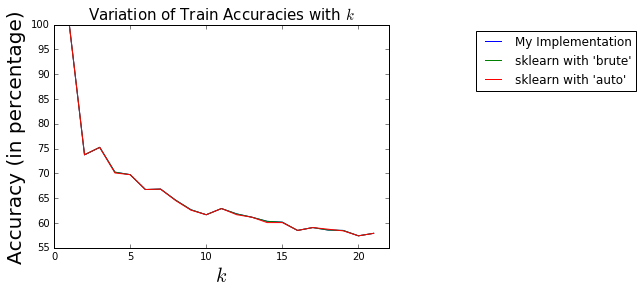

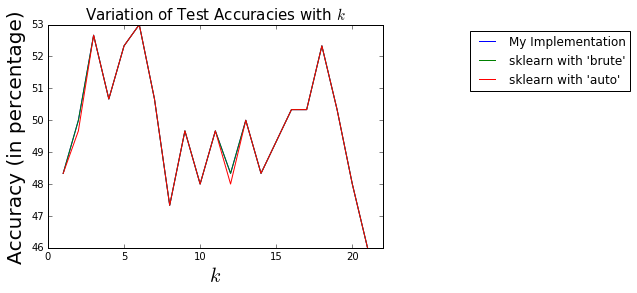

In [8]:
%matplotlib inline
for key in train_accuracy_vals.keys():
    train_accuracy_vals[key] = np.array(train_accuracy_vals[key])
    
for key in test_accuracy_vals.keys():
    test_accuracy_vals[key] = np.array(test_accuracy_vals[key])

# Plotting the Train Accuracies
plt.subplot(111);
plt.xlabel('$k$', size=20);
plt.ylabel('Accuracy (in percentage)', size=20);
plt.xlim(0, 22);
plt.title('Variation of Train Accuracies with $k$', size=15);
plt.plot(train_accuracy_vals['my_impl'][:,0], train_accuracy_vals['my_impl'][:,1], label='My Implementation');
plt.plot(train_accuracy_vals['sklearn_impl_with_brute'][:,0], train_accuracy_vals['sklearn_impl_with_brute'][:,1], label='sklearn with \'brute\'');
plt.plot(train_accuracy_vals['sklearn_impl_with_auto'][:,0], train_accuracy_vals['sklearn_impl_with_auto'][:,1], label='sklearn with \'auto\'');
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1));
plt.show();

plt.clf();

# Plotting the Test Accuracies
plt.subplot(111);
plt.xlabel('$k$', size=20);
plt.ylabel('Accuracy (in percentage)', size=20);
plt.xlim(0, 22);
plt.title('Variation of Test Accuracies with $k$', size=15);
plt.plot(test_accuracy_vals['my_impl'][:,0], test_accuracy_vals['my_impl'][:,1], label='My Implementation');
plt.plot(test_accuracy_vals['sklearn_impl_with_brute'][:,0], test_accuracy_vals['sklearn_impl_with_brute'][:,1], label='sklearn with \'brute\'');
plt.plot(test_accuracy_vals['sklearn_impl_with_auto'][:,0], test_accuracy_vals['sklearn_impl_with_auto'][:,1], label='sklearn with \'auto\'');
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1));
plt.show();

plt.clf();

##### Some worthwhile inferences:

+ Train accuracy goes down with increase in k
+ Test accuracy has an increasing trend with k, although it is not monotonically increasing
+ Train and test accuracies match for my implementation and `sklearn`'s implementation

The crux of the implementation of `sklearn` is the speed. Below are the plots of time taken with `k` comparing my implementation and `sklearn`'s implementation.

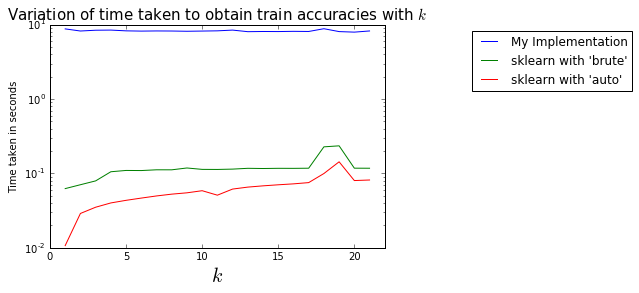

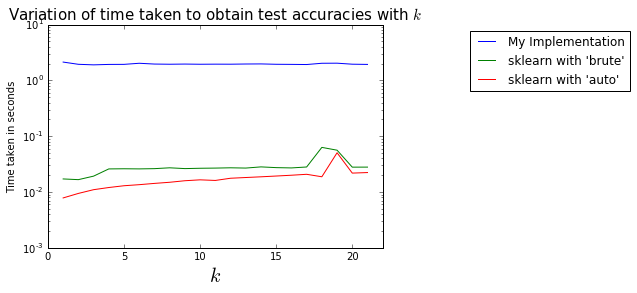

In [9]:
for key in train_time_vals.keys():
    train_time_vals[key] = np.array(train_time_vals[key])
    
for key in test_time_vals.keys():
    test_time_vals[key] = np.array(test_time_vals[key])

# Plotting the Train Accuracies
plt.subplot(111);
plt.xlabel('$k$', size=20);
plt.ylabel('Time taken in seconds', size=10);
plt.yscale('log');
plt.xlim(0, 22);
plt.title('Variation of time taken to obtain train accuracies with $k$', size=15);
plt.plot(train_time_vals['my_impl'][:,0], train_time_vals['my_impl'][:,1], label='My Implementation');
plt.plot(train_time_vals['sklearn_impl_with_brute'][:,0], train_time_vals['sklearn_impl_with_brute'][:,1], label='sklearn with \'brute\'');
plt.plot(train_time_vals['sklearn_impl_with_auto'][:,0], train_time_vals['sklearn_impl_with_auto'][:,1], label='sklearn with \'auto\'');
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1));
plt.show();

plt.clf();

# Plotting the Test Accuracies
plt.subplot(111);
plt.xlabel('$k$', size=20);
plt.ylabel('Time taken in seconds', size=10);
plt.yscale('log');
plt.xlim(0, 22);
plt.title('Variation of time taken to obtain test accuracies with $k$', size=15);
plt.plot(test_time_vals['my_impl'][:,0], test_time_vals['my_impl'][:,1], label='My Implementation');
plt.plot(test_time_vals['sklearn_impl_with_brute'][:,0], test_time_vals['sklearn_impl_with_brute'][:,1], label='sklearn with \'brute\'');
plt.plot(test_time_vals['sklearn_impl_with_auto'][:,0], test_time_vals['sklearn_impl_with_auto'][:,1], label='sklearn with \'auto\'');
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1));
plt.show();

plt.clf();

##### Some more worthwhile inferences:

+ The time taken by both `sklearn`'s implementation with `algorithm='brute'` and `algorithm='auto'` is significantly lower than my implementation
+ The time taken doesn't seem to vary much with k

In k is an even number, there could be a tie. In the constructed dataset, I don't observe any ambiguities between the accuracies in my implementation and `sklearn`'s implementation with `algorithm='brute'`. This could mean that:

+ There were no ties
+ The classes assigned happened to be the same, in the case of a tie

Note the variation in the result with `algorithm='auto'` and `algorithm='brute'`. I believe that this variation is due to the structure -finding principle of `sklearn`'s implementation with `algorithm='auto'`. 